In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/jensk/code/JensKlug/zillows_real_estate/raw_data/HouseTS.csv')

In [3]:
df.head()

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
type(df['zipcode'][0])

numpy.int64

In [6]:
i = 30002
df_onezipcode = df[df['zipcode'] == i]

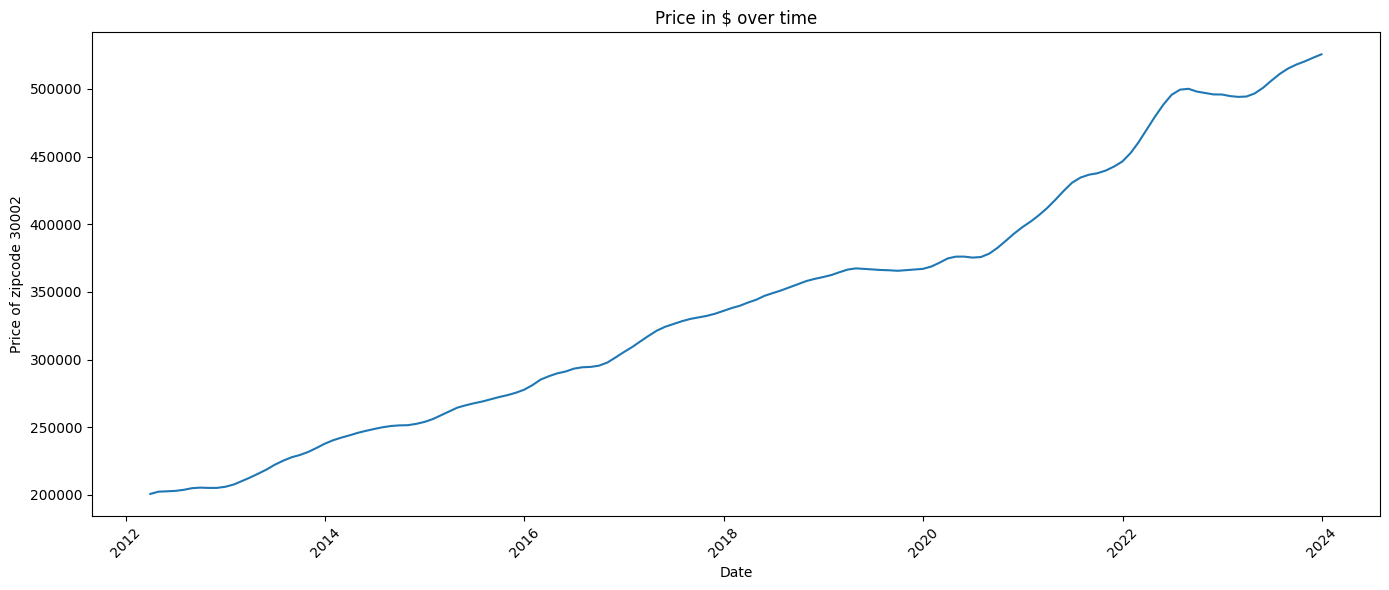

In [7]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_onezipcode, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of zipcode {i}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
k = 'ATL'
df_one_city = df[df['city'] == k][['date','price']]
df_one_city

,date,price
0,2012-03-31,200773.999557
1,2012-04-30,202421.064584
2,2012-05-31,202681.309539
3,2012-06-30,202998.603897
4,2012-07-31,203781.903446
...,...,...
28821,2023-08-31,176889.200198
28822,2023-09-30,176989.845702
28823,2023-10-31,177274.045213
28824,2023-11-30,178461.071541


In [13]:
zipcode = 30002
city = df[df['zipcode'] == zipcode].city.values[0]
city

'ATL'

In [ ]:
df_one_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28826 entries, 0 to 28825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    28826 non-null  datetime64[ns]
 1   price   28826 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 675.6 KB


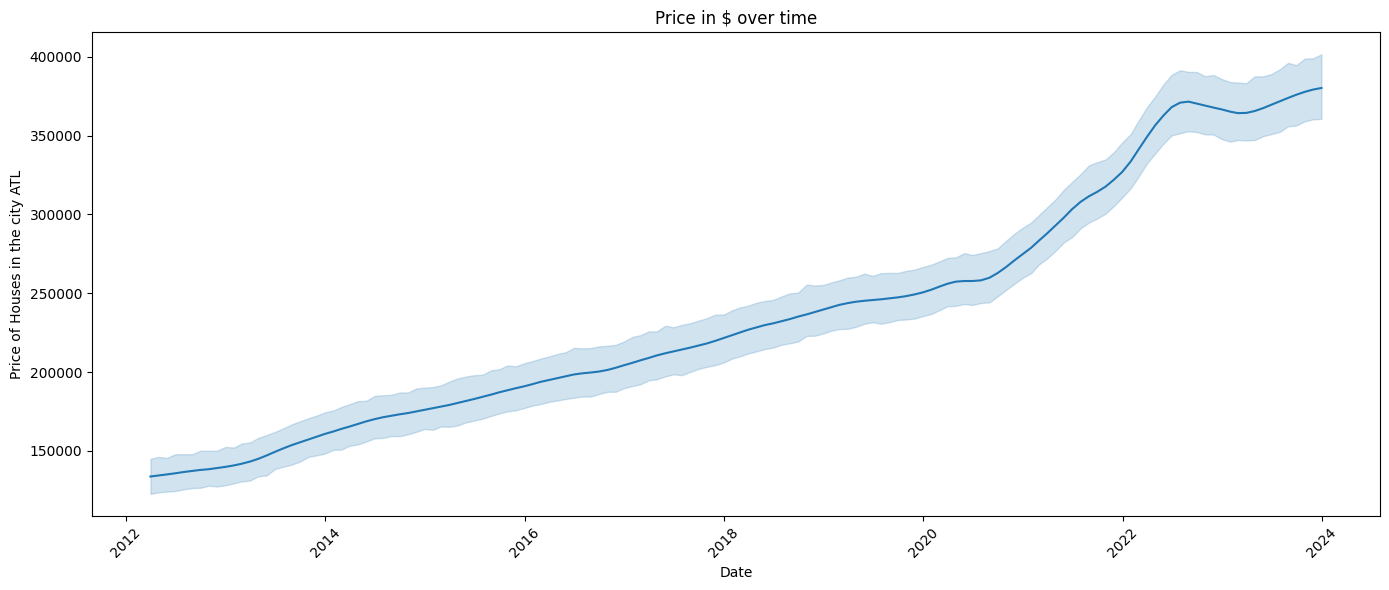

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_one_city, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of Houses in the city {k}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_date_price = df[['date', 'price']]
df_date_price

,date,price
0,2012-03-31,200773.999557
1,2012-04-30,202421.064584
2,2012-05-31,202681.309539
3,2012-06-30,202998.603897
4,2012-07-31,203781.903446
...,...,...
884087,2023-08-31,438238.668892
884088,2023-09-30,440569.503271
884089,2023-10-31,442965.899354
884090,2023-11-30,444955.530200


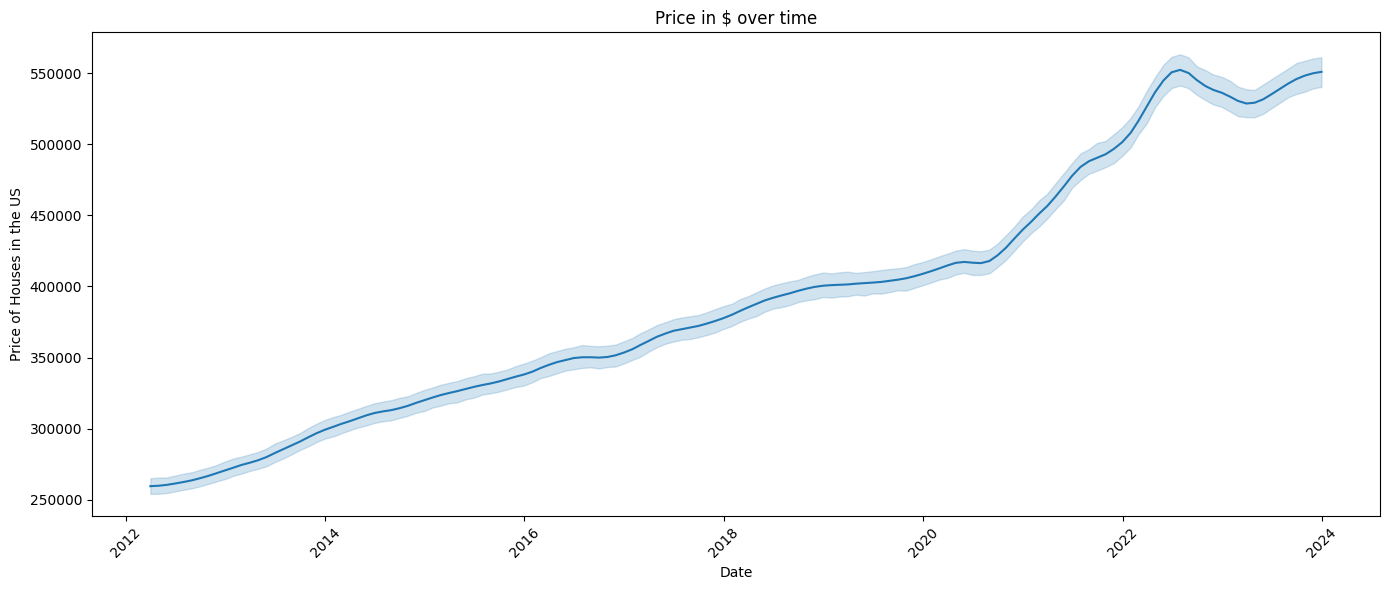

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_date_price, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of Houses in the US')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes

date                            datetime64[ns]
median_sale_price                      float64
median_list_price                      float64
median_ppsf                            float64
median_list_ppsf                       float64
homes_sold                             float64
pending_sales                          float64
new_listings                           float64
inventory                              float64
median_dom                             float64
avg_sale_to_list                       float64
sold_above_list                        float64
off_market_in_two_weeks                float64
city                                    object
zipcode                                  int64
year                                     int64
bank                                   float64
bus                                    float64
hospital                               float64
mall                                   float64
park                                   float64
restaurant   

In [ ]:
df_grouped_by_city_date_mean = df.groupby(['city', 'date'])['price'].mean().reset_index()
df_grouped_by_city_date_mean

,city,date,price
0,ATL,2012-03-31,133735.943778
1,ATL,2012-04-30,134364.944784
2,ATL,2012-05-31,135070.566588
3,ATL,2012-06-30,135769.214812
4,ATL,2012-07-31,136587.779376
...,...,...,...
4255,TPA,2023-08-31,407125.323061
4256,TPA,2023-09-30,408310.304070
4257,TPA,2023-10-31,409475.180681
4258,TPA,2023-11-30,410333.584449


In [ ]:
df_grouped_by_city_date_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260 entries, 0 to 4259
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    4260 non-null   object        
 1   date    4260 non-null   datetime64[ns]
 2   price   4260 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 100.0+ KB


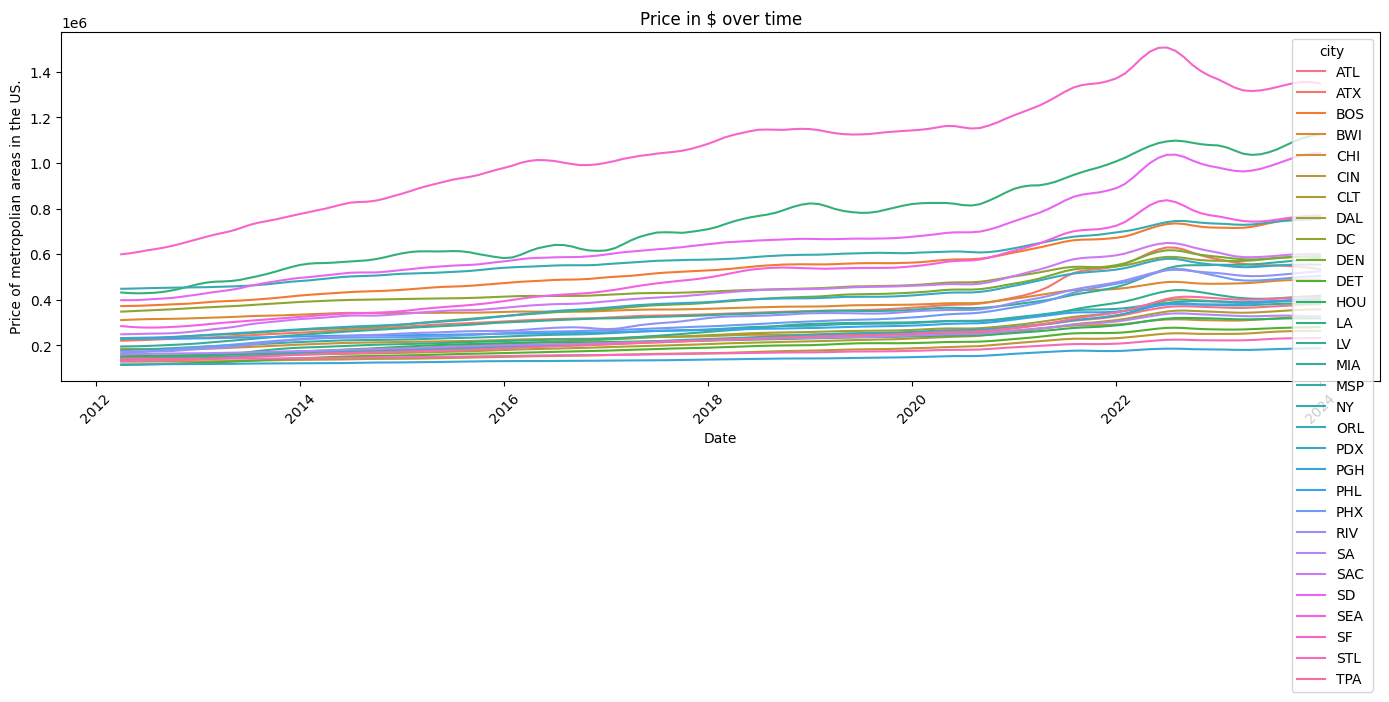

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped_by_city_date_mean, x='date', y='price', hue='city')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of metropolian areas in the US.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

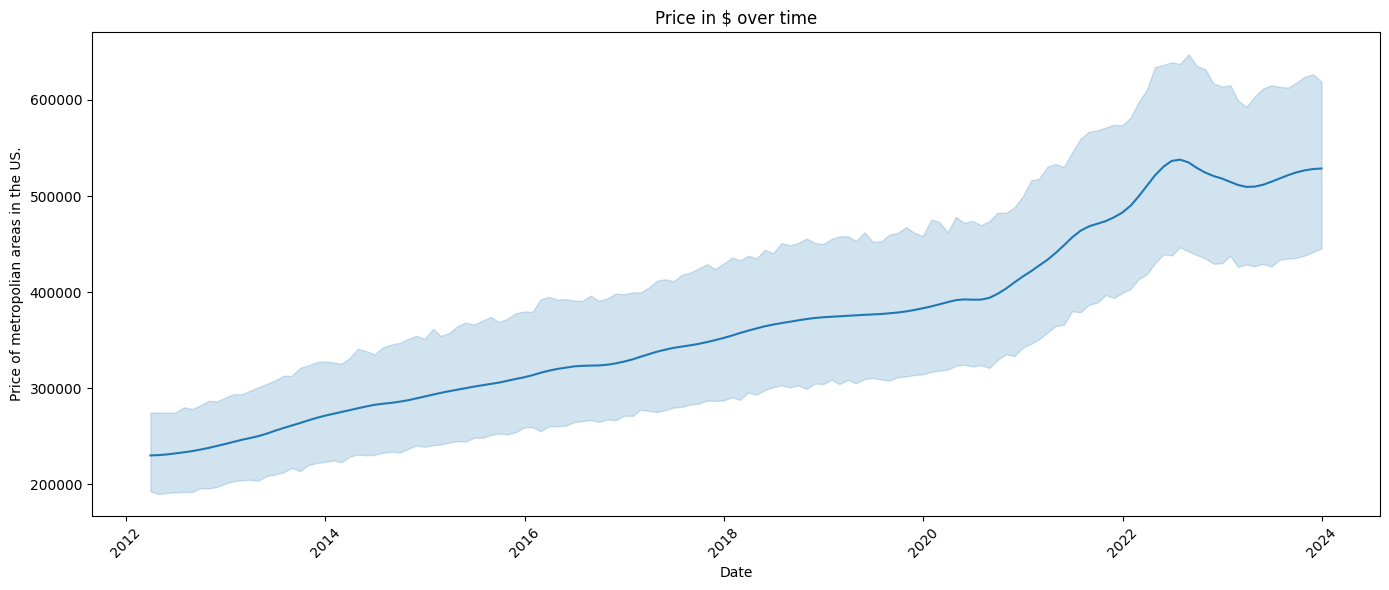

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped_by_city_date_mean, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of metropolian areas in the US.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
j = 'ATL'
atl = df_grouped_by_city_date_mean[df_grouped_by_city_date_mean['city'] == j]

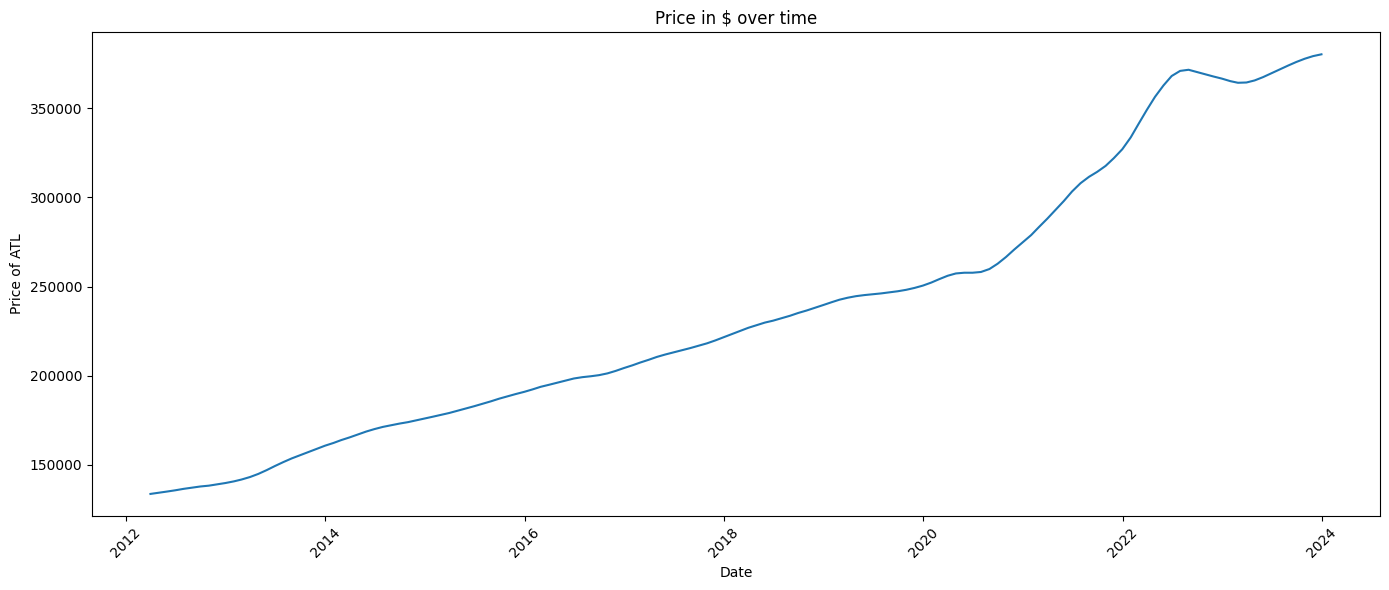

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=atl, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of {j}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

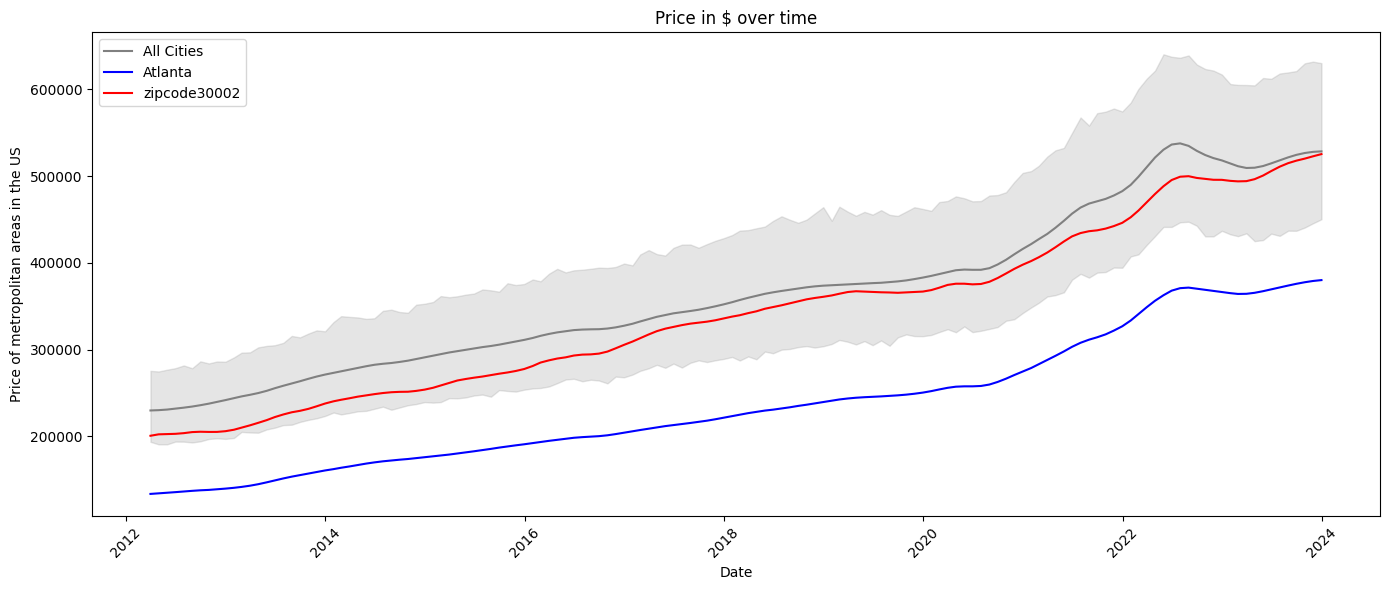

In [ ]:
plt.figure(figsize=(14, 6))

# Plot all cities (grouped)
sns.lineplot(data=df_grouped_by_city_date_mean, x='date', y='price', label='All Cities', color='gray')

# Plot specific city (e.g., 'atl')
sns.lineplot(data=atl, x='date', y='price', label='Atlanta', color='blue')  # or color='red', etc.

sns.lineplot(data=df_onezipcode, x='date', y='price', label=f'zipcode{i}',color='red')

plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel('Price of metropolitan areas in the US')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
city = df.loc[df['zipcode'] == 30002, 'city'][0]
type(city)

str